# Project 2020 - Fundamentals of Data Analysis
This project performs and explains simple linear regression using the Python programming language. Using the *powerproduction* dataset, it sets out to accurately predict wind turbine power output from wind speed values

<br>



***

<br>



Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Plot style
plt.style.use('ggplot')

# Plot size
plt.rcParams['figure.figsize'] = [11, 6]

<br>



Read in powerproduction.csv  

In [3]:
pp = pd.read_csv("powerproduction.csv")
pp.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


<br>



The describe() method gives us a summary overview of the dataset, including the mean, standard deviation and quartile distribution of both variables

In [4]:
pp.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


<br>



#### Plot data for visualisation

Next, the variables are plotted on a scatterplot. Scatterplots allows us to visualise the relationship between two variables in a dataset. Through visualisation, we can get a preliminary indication as to what predictive model might be best suited. This can be inferred from the shape of the relationship between the variables. It can also give us additional information, such as the presence of outliers.

Text(0, 0.5, 'power (kW)')

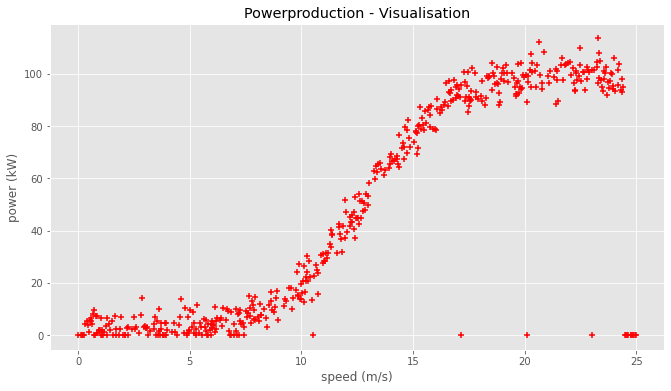

In [5]:
plt.scatter(pp.speed,pp.power,color='red',marker='+')

plt.title('Powerproduction - Visualisation')
plt.xlabel('speed (m/s)')
plt.ylabel('power (kW)')


We can see clearly that there is a strong relationship between both variables. It is important to establish a relationship *before* attempting to fit a linear model to observed data [1]. Often, as above, this can be see through data visualisation. However we can also use statistical methods to determine the relationship. A commonly used numerical measure in this regard is the *correlation coefficient*, which quantifies the association between two variables [2]. Also known as the *R-squared* value, this will be examined in greater detail below.

#### Wind Turbine Power Curve
Looking more closely at the plot, we see that it produces a visualisation of the typical wind turbine power curve. The *cut-in* wind speed is at ~7m/s, below which the turbine is producing hardly any power. Between speeds of ~7 and ~17m/s the power ramps up to what is known as the *rated power capacity*. From speeds of ~17m/s the power generated remains more or less constant, right up to ~25m/s, or the *cut-out* wind speed. While there is much potential power in the wind speed above the cut-out speed, the cost of making the turbine capable of producing power under these conditions outweights the benefits of more power being generated [3]. <br>

#### Outliers
What is also notable from the plot is the presence of seeming outliers in the data. Broadly speaking, an outlier is a data point that is extremely high or extremely low [4]. They can impact the performace of a predictive model, misrepresenting the the data used to train and test the model. There are a number of observations where no power (0kW) is being generated despite sufficiently high wind speeds. We will take a closer look at these outliers below. 

#### Predictive model
From initial visualisation, we may deduce that a line (or curve) would closely fit the data. This implies that a linear regression model could be used to make power output predictions. As specified in the project brief, simple linear regression will be explained and performed on the *powerproduction* data set. A simple linear regression model has only one *predictor* i.e. a single independent variable (the *speed* variable in the context of the current project). It involves fitting a straight line to the data. However a curved line may yield more accurate results. This will also be exaimed further below.

<br>



### Regression Analysis

Regression analysis is a statistical method which describes the relationship between a *dependent* variable and one or more *independent* variables [1]. It can be used to infer the nature of the relationship and consequently, can enable us to make predictions based on a known independent variable or establish causation relationships between variables. In machine learning, it is used primarily to build predictive models [2] and it is this use which will be investigated below.
<br>


### Simple linear regression
There are numerous types of regression analysis and choosing the most appropriate one depends on various factors, such as the nature of the data, the information the researcher is seeking to extract among others [3]. The simplest case of regression is simple linear regression. It is applied to a *bivariate* data set. The *powerproduction* data set meets this criterion with *wind speed* and *power output* its only two vriables. 



Linear regression, as implied by the name, involves fitting a straight line to observed data. Curved lines can also be used, depending on the relationship between the variables. Logistic and nonlinear regression may be used in these cases [4].

In [6]:
coeffs = np.polyfit(pp.speed, pp.power, 1)
coeffs

array([  4.91759567, -13.89990263])

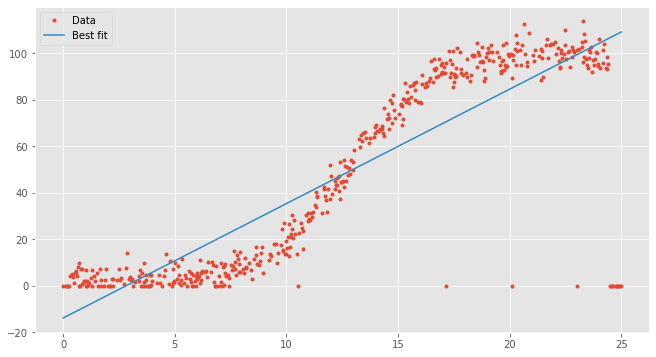

In [7]:
plt.plot(pp.speed, pp.power, '.', label="Data")
plt.plot(pp.speed, coeffs[0] * pp.speed + coeffs[1], '-', label='Best fit')
plt.legend();

Each column is separated from the dataset

In [8]:
speed_df = pp.drop('power',axis='columns')
speed_df

,speed
0,0.000
1,0.125
2,0.150
3,0.225
4,0.275
...,...
495,24.775
496,24.850
497,24.875
498,24.950


In [9]:
power = pp.power
power

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
Name: power, Length: 500, dtype: float64

<br>



In [10]:
reg = LinearRegression()
reg.fit(speed_df, power)

LinearRegression()

In [11]:
reg.predict([[9.746]])

array([34.02698472])

In [12]:
reg.coef_

array([4.91759567])

In [13]:
reg.intercept_

-13.899902630519641

In [14]:
4.91759567*9.746 -13.899902630519641

34.02698476930036

In [15]:
rng = np.random.default_rng()

In [16]:
speed_list = 25 * rng.random(10) - 0

In [17]:
speed_arr = speed_list.reshape(-1, 1)
speed_arr

array([[ 7.48179795],
       [18.51221776],
       [ 1.79986733],
       [ 7.82795294],
       [ 8.08958063],
       [ 4.58586759],
       [ 8.69990942],
       [ 6.89986973],
       [ 7.63050082],
       [16.0940101 ]])

In [18]:
#speed_arr = speed_list.reshape(1, -1)

In [19]:
power_rand = reg.predict(speed_arr)
power_rand

array([22.89255452, 77.1356992 , -5.04888283, 24.5948048 , 25.88138402,
        8.65153994, 28.88273421, 20.03086686, 23.62381515, 65.24393166])

In [20]:
score = reg.score(speed_arr, power_rand)
score

1.0

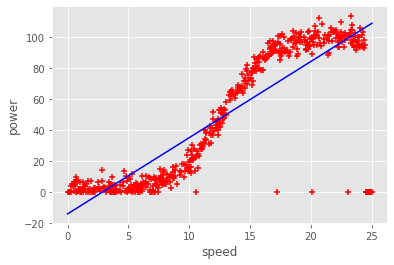

In [21]:
%matplotlib inline
plt.xlabel('speed')
plt.ylabel('power')
plt.scatter(pp.speed,pp.power,color='red',marker='+')
plt.plot(pp.speed,reg.predict(pp[['speed']]),color='blue')

Fit line to data where turbine power most responsive

In [22]:
vmin = 7
vmax = 18
column = 'speed'


df1 = pp[pp[column].between(vmin, vmax)]
df1

,speed,power
138,7.057,1.485
139,7.082,9.779
140,7.107,0.000
141,7.157,7.973
142,7.182,0.067
...,...,...
354,17.643,102.322
355,17.793,100.429
356,17.818,93.105
357,17.843,91.270


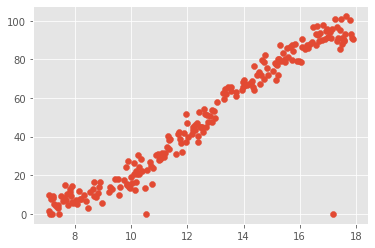

In [23]:
plt.scatter(df1.speed, df1.power)

In [24]:
A = df1.iloc[:, :-1].values
B = df1.iloc[:, 1].values

In [25]:
from sklearn.model_selection import train_test_split
A_Train, A_Test, B_Train, B_Test = train_test_split(A, B, test_size = 0.2)

In [26]:
reg.fit(A_Train, B_Train)

LinearRegression()

In [27]:
reg.predict(A_Test)

array([ 5.31709416e+01,  9.55143955e+01,  8.87840554e+01,  9.31107026e+01,
        5.24498337e+01,  2.83840605e+01,  8.41418000e+00,  1.46733963e+01,
        6.92949135e+01,  6.49586515e+01, -8.35988532e-03, -4.89098463e-01,
        3.44029075e+01,  9.52740262e+01,  9.35914412e+01,  1.17889648e+01,
        2.21344590e+01,  9.98506575e+01,  7.48234071e+01,  4.90846637e+01,
        8.66111170e+01,  8.42074242e+01,  2.62207369e+01,  6.27953279e+01,
        8.99859019e+01,  5.77011782e+00,  3.84716351e+00, -2.17168348e+00,
        4.54695096e+01,  7.14582371e+01,  7.79578226e+01,  9.04666404e+01,
        1.20293341e+01,  2.95955217e+01,  5.87090500e+01,  4.01813852e+01,
        7.96404077e+01,  6.73159497e+00,  2.09326126e+01,  5.14883566e+01,
        8.80629475e+01,  7.02563906e+01,  7.72271000e+01,  9.50336569e+01,
        1.15485955e+01])

In [28]:
B_Test

array([53.281, 91.206, 92.753, 91.27 , 53.954, 22.216,  9.812,  5.554,
       79.586, 67.263,  0.   ,  4.597, 28.452, 89.613,  0.   , 16.413,
       17.393, 93.105, 80.183, 44.801, 89.134, 85.173, 16.474, 68.232,
       90.171,  6.983, 11.321,  8.238, 41.599, 72.135, 85.891, 97.532,
        9.42 ,  0.   , 65.889, 31.214, 87.285, 11.749, 14.055, 50.658,
       92.997, 69.699, 80.418, 96.97 , 13.113])

In [29]:
reg.score(A_Test, B_Test)

0.8041449919952205

In [30]:
X = pp.iloc[:, :-1].values
Y = pp.iloc[:, 1].values

In [31]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.1, random_state=4380)

In [32]:
#X_Train

In [33]:
reg.fit(X_Train, Y_Train)

LinearRegression()

In [34]:
df_ytrain = pd.DataFrame(Y_Train)

In [35]:
df_xtrain = pd.DataFrame(X_Train)

In [36]:
'''
function to find random seed which produces the highest r-squared value
'''
def best_seed():
    scores = []
    for i in range(10000):
        X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.1, random_state=i)
        reg.fit(X_Train, Y_Train)
        scores.append(reg.score(X_Test, Y_Test))
    return scores        

In [37]:
scores = best_seed()

In [38]:
min(scores)

-0.09741570609812222

In [39]:
max(scores)

0.9306242340561958

In [40]:
scores.index(0.9306242340561958)

4380

In [41]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


KeyError: (slice(None, None, None), None)

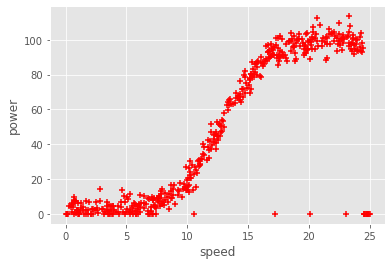

In [42]:
%matplotlib inline
plt.xlabel('speed')
plt.ylabel('power')
plt.scatter(df_xtrain,df_ytrain,color='red',marker='+')
plt.plot(df_xtrain,reg.predict(df_xtrain),color='blue')

In [ ]:
df_xtrain.describe()

In [ ]:
pp.describe()

In [ ]:
pp[['speed']]

In [ ]:
reg.predict(X_Test)

In [ ]:
Y_Test

In [ ]:
reg.score(X_Test, Y_Test)

In [ ]:
len(Y_Test)

In [ ]:
len(X_Test)

In [ ]:
x = pp["speed"]
y = pp["power"]

In [ ]:
sns.scatterplot(x, y)

In [ ]:
from scipy.stats import pearsonr 

In [ ]:
corr, _ = pearsonr(pp["speed"], pp["power"]) 
print('Pearsons correlation: %f' % corr) 

In [ ]:
model = LinearRegression()

In [ ]:
arr = pp.to_numpy()

In [ ]:
#print(arr[:,0])

In [ ]:
x = arr[:,0]

In [ ]:
y = arr[:,1]

In [ ]:
x = x.reshape(-1, 1)

In [ ]:
x[:10]

In [ ]:
x[-10:]

In [ ]:
model.fit(x, y)

In [ ]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

In [ ]:
print('intercept:', model.intercept_)

In [ ]:
print('slope:', model.coef_)

In [ ]:
m = model.coef_

In [ ]:
model.predict([[9.746]])

### References

[1] yale.edu; Linear Regression; http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm <br>
[2] yale.edu; Correlation; http://www.stat.yale.edu/Courses/1997-98/101/correl.htm <br>
[3] youtube.com; Wind Turbine Power Curve description; https://www.youtube.com/watch?v=8tNOL4ZL9Do <br>
[4] statisticshowto.com; Linear Regression: Simple Steps, Video. Find Equation, Coefficient, Slope; https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/ <br>
[1] Wikipedia; Regression analysis; https://en.wikipedia.org/wiki/Regression_analysis<br>
[2] Malil, F; How Good is My Predictive Model - Regression Analysis; https://medium.com/fintechexplained/part-3-regression-analysis-bcfe15a12866 <br>
[3] Frost, J; Choosing the Correct Type of Regression Analysis; https://statisticsbyjim.com/regression/choosing-regression-analysis/ <br>
[4] Bevvans, R; An Introduction to Simple Linear Regression; https://www.scribbr.com/statistics/simple-linear-regression/ <br>